<a href="https://colab.research.google.com/github/SLAA1234/AI-Project/blob/master/AI_project_Regression_Boston_House_Price_Analysis_Lisa_Wang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

In this project I create models to analyze the relations between Boston's house price and the other 13 influential factors. The results shows both linear regression and ANN models works good on explaining the difference of house prices.

At the end I compare the the performaces of the two models, and explain the factors that affect the preformance of ANN model based on the practice.

The dataset I download from Kaggle, https://www.kaggle.com/vikrishnan/boston-house-prices. The dataset includes 506 cases, each cases include 14 attributes, which are listed in Prepare Data section. 


# Import Necessary Libraries

In [32]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Prepare Data

### Load data

In [33]:
# upload local csv file to colab

from google.colab import  files

uploaded = files.upload()

Saving housing.csv to housing (1).csv


In [34]:
# import data into a dataframe

import io

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BK', 'LSTAT', 'MEDV']

df = pd.read_csv(io.BytesIO(uploaded['housing.csv']), names=column_names, na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

In [35]:
# check what the data looks like

df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Data Attributes:**

0. CRIM: per capita crime rate by town
1. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
2. INDUS: proportion of non-retail business acres per town
3. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
4. NOX: nitric oxides concentration (parts per 10 million)
5. RM: average number of rooms per dwelling
6. AGE: proportion of owner-occupied units built prior to 1940
7. DIS: weighted distances to ve Boston employment centers
8. RAD: index of accessibility to radial highways
9. TAX: full-value property-tax rate per USD 10,000
10. PTRATIO: pupil-teacher ratio by town
11. Bk: 1000(Bk - 0:63)^2 where Bk is the proportion of blacks by town
12. LSTAT: % lower status of the population
13. MEDV: Median value of owner-occupied homes in USD 1000s

In [36]:
# check if there is NaN values
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
BK         0
LSTAT      0
MEDV       0
dtype: int64

In [37]:
# convert dataframe from pandas to numpy array
data = df.values
type(data)

numpy.ndarray

In [38]:
# check dataset shape
data.shape

(506, 14)

In [39]:
# check data dtype
data.dtype

dtype('float64')

In [40]:
# split dataset into training set and test set
training, test = train_test_split(data, test_size=0.33, random_state=42)


In [41]:
# split into input and output variables
train_x = training[:,0:13]
train_y = training[:,13]
test_x = test[:,0:13]
test_y = test[:,13]

In [42]:
# check training data
training.shape

(339, 14)

In [43]:
# check test data
test.shape

(167, 14)

In [44]:
# Standard Scaler 
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.fit_transform(test_x)

# Linear Regression Model

### create model

In [45]:
# create model
lr = LinearRegression()
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### evaluate model

In [46]:
# evaluate model with RMSE
train_y_predict = lr.predict(train_x)
rmse = (np.sqrt(mean_squared_error(train_y, train_y_predict)))

# the model performance for training set
print('RMSE for training set is {}'.format(rmse))

RMSE for training set is 4.794269062151269


In [47]:
# evaluate model for test set
test_y_predict = lr.predict(test_x)
rmse_test = (np.sqrt(mean_squared_error(test_y, test_y_predict)))

# the model performance for test set
print('RMSE for test set is {}'.format(rmse_test))

RMSE for test set is 4.731522715744227


**RMSE result for test set is very simiar with result with training set.** 

In [48]:
# evaluate model with R2-score
r2 = r2_score(train_y, train_y_predict)

# the model performance for training set
print('R2-score for training set is {}'.format(r2))

R2-score for training set is 0.7392344370995025


In [49]:
# evaluate model for test set
test_y_predict = lr.predict(test_x)
r2_test = r2_score(test_y, test_y_predict)

# the model performance for test set
print('R2-score for test set is {}'.format(r2_test))

R2-score for test set is 0.7041787993571815


#### **r2-score for test set and training set both over 0.7, means more than 70% of housing price's variation is accounted for by the model. So it seems the model is good, but need some improvement.**

### model visualization

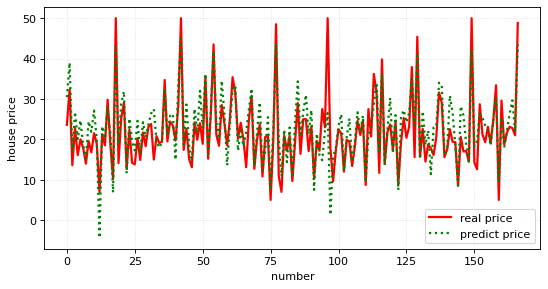

In [50]:
# set figure size
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(range(len(test_y)), test_y, ls='solid', lw=2, c='r', label='real price')
plt.plot(range(len(test_y_predict)), test_y_predict, ls='dotted', lw=2, c='g', label='predict price')

# plot grid
plt.grid(alpha=0.4, linestyle=':')
plt.legend()
plt.xlabel('number')
plt.ylabel('house price')
plt.show()

# ANN Model

### create model

In [51]:
# the last layer don't need activation because we predict the house price, not classification
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(13,)),
    keras.layers.Dense(64, activation='relu', input_dim=13),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)])

### compile model

In [52]:
# because we predict prices, a lineral regression predict, so loss is different from classification. mean_squared_error
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

### fit data to network

In [53]:
model.fit(train_x, train_y, batch_size=10, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 533.7902 - mae: 21.1178
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 179.6149 - mae: 10.9794
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 47.4342 - mae: 5.2874
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 25.3372 - mae: 3.7501
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 20.7581 - mae: 3.3491
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 18.4897 - mae: 3.1581
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 17.0013 - mae: 3.0172
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 15.6037 - mae: 2.9165
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 14.9452 - mae: 2.8335
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 13.9025 - mae: 2.7333
Epoch 11/200
34/34 [=========================

#### evaluate the model

In [54]:
# predict test_y
test_y_predict = model.predict(test_x)

test_y_predict

array([[30.61726  ],
       [39.085236 ],
       [14.241635 ],
       [23.591368 ],
       [16.883574 ],
       [25.448362 ],
       [19.64858  ],
       [15.498718 ],
       [24.085646 ],
       [19.662722 ],
       [24.104616 ],
       [22.327787 ],
       [ 5.110456 ],
       [24.435287 ],
       [17.974081 ],
       [24.058146 ],
       [19.182735 ],
       [11.612892 ],
       [51.656452 ],
       [13.273265 ],
       [25.24     ],
       [28.532175 ],
       [11.006484 ],
       [25.620607 ],
       [17.373146 ],
       [14.9025755],
       [22.613817 ],
       [12.884051 ],
       [25.63399  ],
       [19.420525 ],
       [27.940952 ],
       [27.548475 ],
       [19.826406 ],
       [25.822275 ],
       [15.221795 ],
       [21.032385 ],
       [38.05675  ],
       [18.805136 ],
       [24.711796 ],
       [23.782078 ],
       [16.331846 ],
       [31.008783 ],
       [55.36011  ],
       [19.317541 ],
       [24.797506 ],
       [14.086709 ],
       [15.720429 ],
       [25.25

In [55]:
# evaluate model with r2-scores
ann_r2_score = r2_score(test_y, test_y_predict)

In [56]:
# the model performance for test set
print('R2-score for ANN model is {}'.format(ann_r2_score))

R2-score for ANN model is 0.8046658182559397


#### model optimization

In [57]:
# reduce one hidden layers and reduce one layer's nodes, add one dropout layers
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(13,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

model.fit(train_x, train_y, batch_size=10, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 565.9201 - mae: 21.7988
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 432.6886 - mae: 18.4938
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 246.6945 - mae: 13.2017
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 103.5360 - mae: 7.8536
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 60.9432 - mae: 5.9005
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 43.0894 - mae: 4.9395
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 38.7276 - mae: 4.6433
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 28.3423 - mae: 3.9582
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 27.3161 - mae: 3.8415
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 27.7958 - mae: 3.9493
Epoch 11/200
34/34 [======================

In [58]:
# predict test_y
test_y_predict = model.predict(test_x)

# evaluate model with r2-scores
ann_r2_score = r2_score(test_y, test_y_predict)

# the model performance for test set
print('R2-score for ANN model is {}'.format(ann_r2_score))

R2-score for ANN model is 0.8580965890916522


### Model visualization

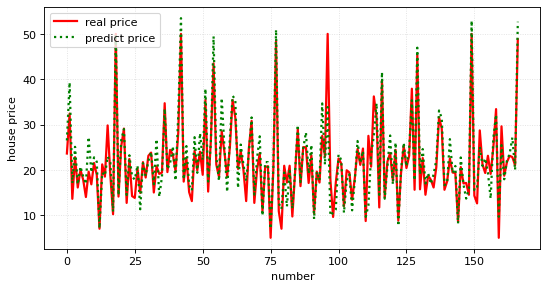

In [59]:
# set figure size
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(range(len(test_y)), test_y, ls='solid', lw=2, c='r', label='real price')
plt.plot(range(len(test_y_predict)), test_y_predict, ls='dotted', lw=2, c='g', label='predict price')

# plot grid
plt.grid(alpha=0.4, linestyle=':')
plt.legend()
plt.xlabel('number')
plt.ylabel('house price')
plt.show()

# Summary

The practice above shows Linear Regression model and ANN model both perform quite good on explain Boston House Price, although they also need improvement.

ANN model performs slightly better than Linear Regression if considering the R2 scores. But more assessment methods should also involves to support the conclusion.

In ANN model, hidden layers, dropout layers and nodes changes all will affect the performance of the model.